# Support Vector Machines 


## The Data
In this Exercise we will use the famous [Iris flower data set](http://en.wikipedia.org/wiki/Iris_flower_data_set). 

The data set consists of 50 samples from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor), so 150 total samples. Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

The iris dataset contains measurements for 150 iris flowers from three different species.

The three classes in the Iris dataset:

    Iris-setosa (n=50)
    Iris-versicolor (n=50)
    Iris-virginica (n=50)

The four features of the Iris dataset:

    sepal length in cm
    sepal width in cm
    petal length in cm
    petal width in cm

## Get the data

**Use pandas to read the Iris data from .csv.**

In [0]:
import pandas as pd
ird = pd.read_csv('iris.csv')

## Data Visualization
**Import some libraries you think you will need for data visualization.**

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


** Create a pairplot of the dataset. Which flower species seems to be the most separable?**

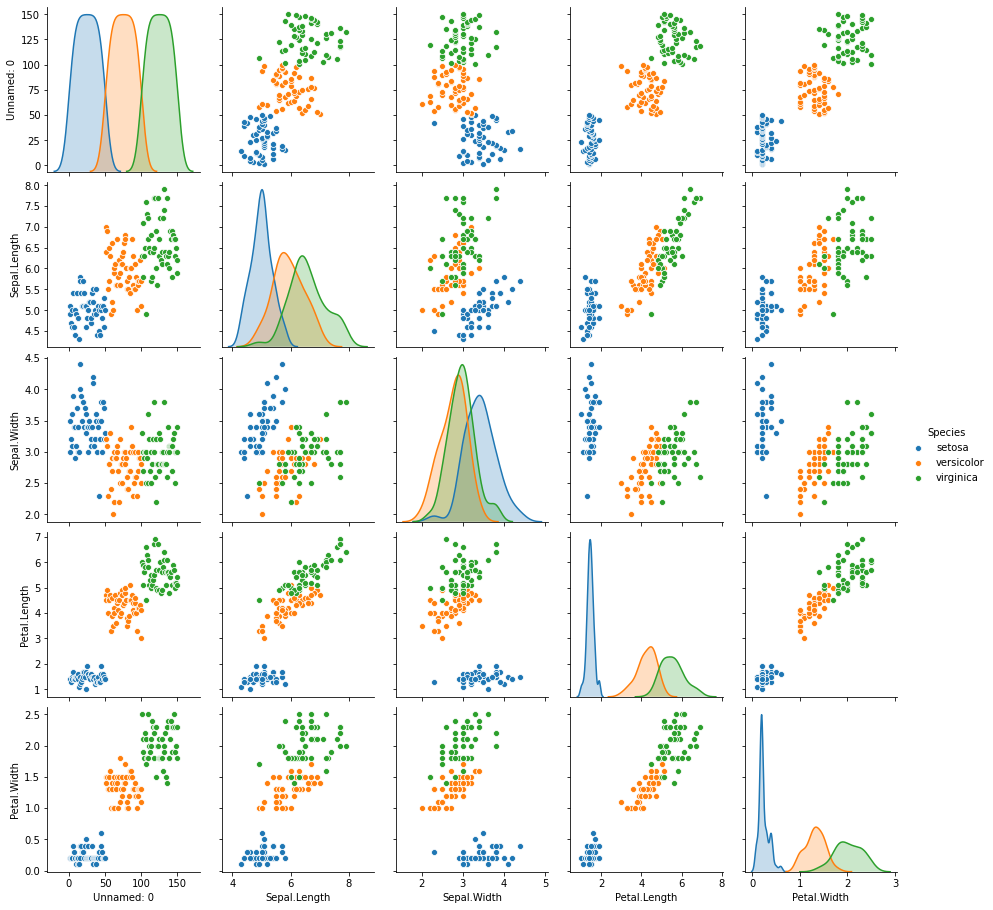

In [4]:
sns.pairplot(data = ird, hue = 'Species')

In [5]:
ird.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


**Create a kde plot of sepal_length versus sepal width for setosa species of flower.**

In [0]:
ird_st = ird[ird['Species'] == 'setosa']
sns.kdeplot(data = ird_st['Sepal.Length'],data2 = ird_st['Sepal.Width'])

## Train Test Split

** Split your data into a training set and a test set.**

In [0]:
x_data = ird.iloc[:,1:-1]
#y_data = pd.get_dummies(data = ird['Species'])
y_data =ird['Species']

In [0]:
import sklearn.model_selection as sklm

In [0]:
x_train,x_test,y_train,y_test = sklm.train_test_split(x_data,y_data)

## Train a Model

**Call the SVC() model from sklearn and fit the model to the training data.**

In [0]:
from sklearn.svm import SVC
sird = SVC()
sird.fit(x_train,y_train)
y_pr = sird.predict(x_test)

82     versicolor
36         setosa
10         setosa
56     versicolor
39         setosa
52     versicolor
9          setosa
78     versicolor
51     versicolor
7          setosa
84     versicolor
100     virginica
141     virginica
138     virginica
94     versicolor
106     virginica
48         setosa
63     versicolor
62     versicolor
35         setosa
41         setosa
76     versicolor
119     virginica
8          setosa
42         setosa
1          setosa
18         setosa
93     versicolor
74     versicolor
142     virginica
54     versicolor
66     versicolor
103     virginica
38         setosa
71     versicolor
146     virginica
96     versicolor
87     versicolor
Name: Species, dtype: object

## Model Evaluation

** Get predictions from the model and create a confusion matrix and a classification report and check the accuracy score.**

In [0]:
import sklearn.metrics as sklme

In [0]:
con = sklme.confusion_matrix(y_test,y_pr)
print(con)

[[13  0  0]
 [ 0 17  0]
 [ 0  1  7]]


In [0]:
acc = sklme.accuracy_score(y_test,y_pr)
print(acc)

0.9736842105263158


In [0]:
print(sklme.classification_report(y_test,y_pr))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.88      0.93         8

    accuracy                           0.97        38
   macro avg       0.98      0.96      0.97        38
weighted avg       0.98      0.97      0.97        38



## Gridsearch Practice

A standard SVM seeks to find a margin that separates all positive and negative examples. However, this can lead to poorly fit models if any examples are mislabeled or extremely unusual.
To account for this, in 1995, Cortes and Vapnik proposed the idea of a "soft margin" SVM that allows some examples to be "ignored" or placed on the wrong side of the margin; this innovation often leads to a better overall fit. 
C is the parameter for the soft margin cost function, which controls the influence of each individual support vector; this process involves trading error penalty for stability.
A standard SVM is a type of linear classification using dot product. However, in 1992, Boser, Guyan, and Vapnik proposed a way to model more complicated relationships by replacing each dot product with a nonlinear kernel function (such as a Gaussian radial basis function or Polynomial kernel). $\gamma$ is the free parameter to handle non-linear classification of the Gaussian radial basis function.

Let's tune the hyper-parameters. Before digging into these sections, first analyze a little bit more in detail from a theoretical point of view what is the Kernel for SVM, what kind of Kernel is possible to use and what is the role of the parameters C and $\gamma$ (where is needed).

** Import `GridsearchCV` from Scikit-Learn. Check the documentation to understand how it works.**

**Create a dictionary called param_grid and fill out some parameters for C and gamma.**

In [0]:
param_grid = {'C':list(range(1,11)),'gamma':['scale','auto']}
ird_svc = SVC()

** Create a GridSearchCV object and fit it to the training data.**

In [0]:
clf = sklm.GridSearchCV(ird_svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'gamma': ['scale', 'auto']})

** Now take that grid model and create some predictions using the test set and create classification reports, test accuracy and confusion matrix.**

In [0]:
best_para = clf.best_params_
print(best_para)

{'C': 6, 'gamma': 'auto'}


In [0]:
best_C = best_para['C']
best_gamma = best_para['gamma']
best_svc = SVC(C = best_C,gamma = best_gamma)
best_svc.fit(x_train,y_train)
best_y_pre = best_svc.predict(x_test)

In [0]:
con = sklme.confusion_matrix(y_test,y_pr)
print(con)

[[13  0  0]
 [ 0 17  0]
 [ 0  1  7]]


In [0]:
acc = sklme.accuracy_score(y_test,y_pr)
print(acc)
print(sklme.classification_report(y_test,y_pr))

0.9736842105263158
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.88      0.93         8

    accuracy                           0.97        38
   macro avg       0.98      0.96      0.97        38
weighted avg       0.98      0.97      0.97        38



** Were you able to improve? What can you conclude from these results? **

## Gridsearch Extra 

** Now try to tune also the kernel type. Investigate a little bit on which type of kernel you can use and how they work. Repeat the previous step of the GridSearch but changing the parameters grid by adding also the kernel information.**

In [0]:
para_ke = {'kernel':['linear','poly','rbf','sigmoid']}
ird_svc_ke = SVC()
clf_ke = sklm.GridSearchCV(ird_svc_ke,para_ke)
clf_ke.fit(x_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [0]:
best_param_ke = clf_ke.best_params_
print(best_param_ke)
best_kernel = best_param_ke['kernel']
best_svc_kernel = SVC(C = best_C,gamma = best_gamma,kernel = best_kernel)
best_svc_kernel.fit(x_train,y_train)
y_best_para = best_svc_kernel.predict(x_test)


{'kernel': 'linear'}


In [0]:
con = sklme.confusion_matrix(y_test,y_pr)
print('confusion:')
print(con)
acc = sklme.accuracy_score(y_test,y_pr)
print('accu')
print(acc)
print('calssifcation')
print(sklme.classification_report(y_test,y_pr))

confusion:
[[13  0  0]
 [ 0 17  0]
 [ 0  1  7]]
accu
0.9736842105263158
calssifcation
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.88      0.93         8

    accuracy                           0.97        38
   macro avg       0.98      0.96      0.97        38
weighted avg       0.98      0.97      0.97        38



## Decision Boundaries Visualization

We will import again the Iris dataset but this time from Scikit-Learn.

In [0]:
from sklearn import svm, datasets
import numpy as np
import matplotlib.pyplot as plt
iris = datasets.load_iris()

#### Take the first two features of the dataset, the output is already created for you instead.

In [0]:
x_data = iris['data']
X = x_data[:,1:3]

In [0]:
y = iris.target

**Create three SVC instance: the first with linear kernel, the second with rbf kernel and $\gamma= 0.7$, the third with polynomial kernel of degree 3. All the three models with parameter C=0.1. **

**Then fit the three models.**

In [0]:
 clas = [0,0,0]
clas[0] = SVC(kernel = 'linear',C = 0.1)
clas[0].fit(X,y)
clas[1] = SVC(C = 0.1,kernel = 'rbf',gamma = 0.7)
clas[1].fit(X,y)
clas[2] = SVC(C = 0.1,kernel = 'poly',degree = 3)
clas[2].fit(X,y)

SVC(C=0.1, kernel='poly')

In [0]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

#### Fill in the #TO DOs to complete the plot.

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]
[[2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]
 [2 2 2 ... 2 2 2]]


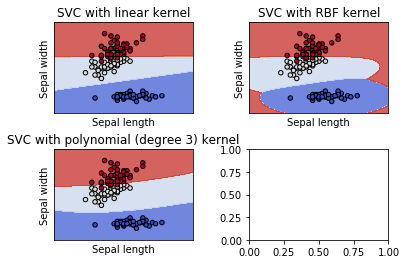

In [0]:
titles = ('SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)


for clf, title, ax in zip(clas,titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()